In [1]:
import pandas as pd
df=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
print(df.shape)

(5110, 12)


In [2]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
pd.set_option('expand_frame_repr',False)

In [5]:
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder
df[['gender','ever_married','work_type','Residence_type','smoking_status']]=df[['gender','ever_married','work_type','Residence_type','smoking_status']].apply(LabelEncoder().fit_transform)

In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [8]:
mean_value=df['bmi'].mean()
df['bmi'].fillna(value=mean_value, inplace=True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


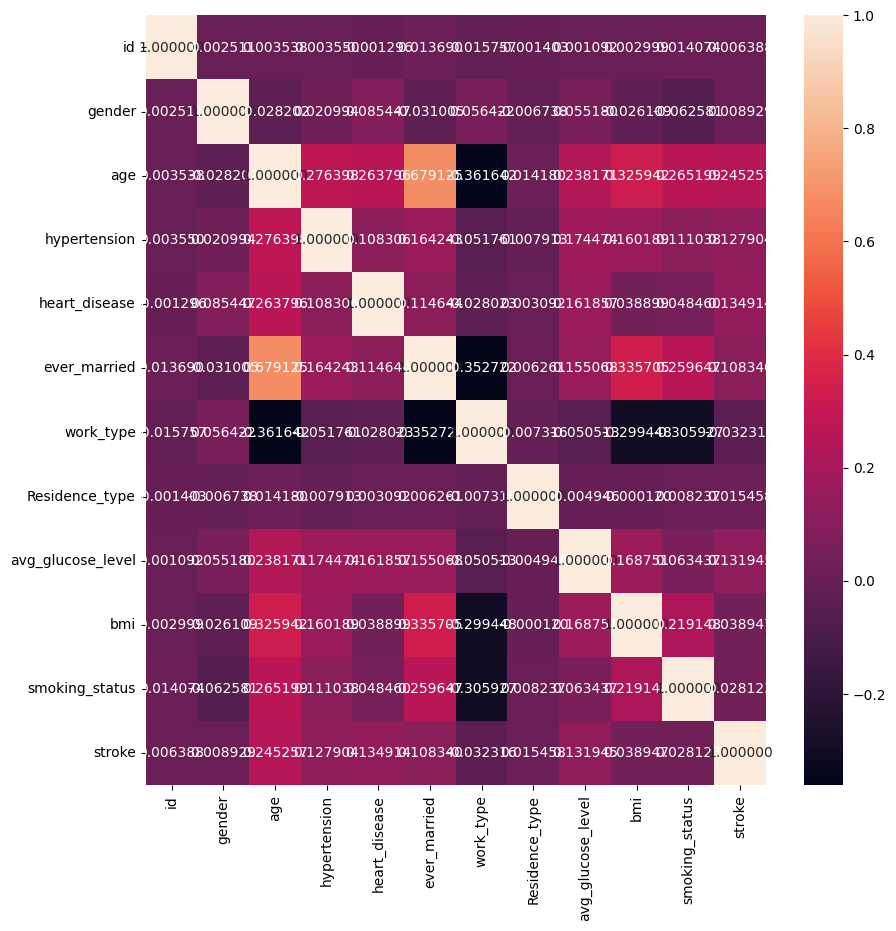

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='1f')
plt.show()

[0 1] [4861  249]
[0 1] [4861  249]


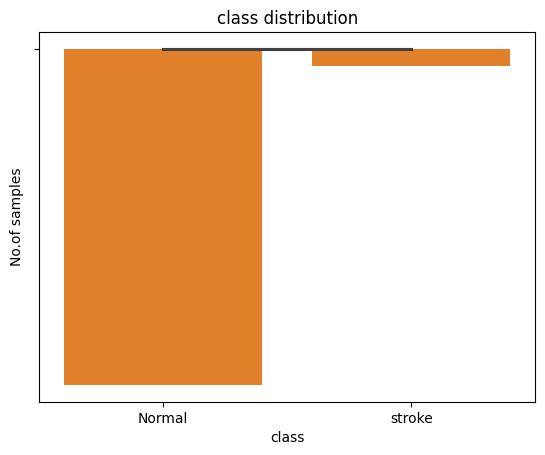

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

(unique,counts) = np.unique(df['stroke'],return_counts=True)
print(unique,counts)
sns.barplot(x=['Normal','stroke'])
print(unique,counts)
sns.barplot(x=['Normal','stroke'],y=counts)
plt.xlabel("class")
plt.ylabel("No.of samples")
plt.xticks()
plt.title('class distribution')
plt.show()

In [11]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [12]:
!pip install imbalanced-learn

In [13]:
import pandas as pd
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_resampled,y_resampled = smote.fit_resample(x,y)

In [14]:
print(x_resampled.shape)
print(y_resampled.shape)
print(y_resampled.value_counts())

(9722, 10)
(9722,)
stroke
1    4861
0    4861
Name: count, dtype: int64


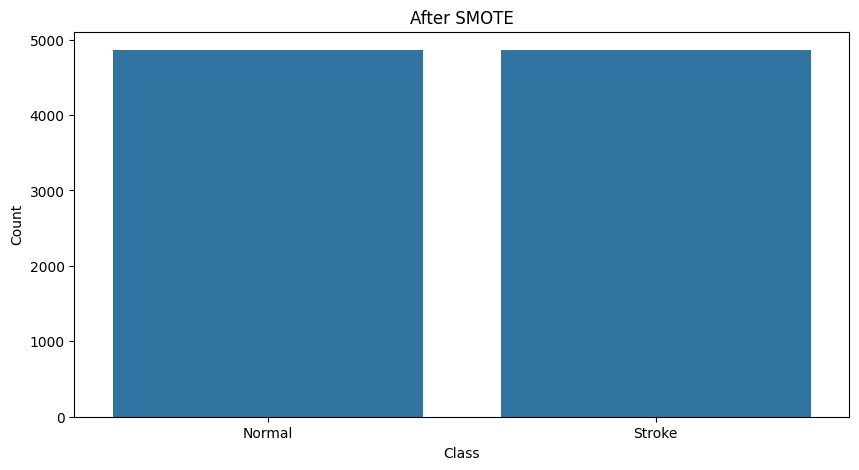

In [15]:
import matplotlib.pyplot as plt
import numpy as np
data = {'Normal':4861, 'Stroke':4861}
classes = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10,5))

sns.barplot(x=classes, y = values)

plt.ylabel('Count')
plt.xlabel('Class')

plt.title('After SMOTE')

plt.show()

In [16]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_resampled = scaler.fit_transform(x_resampled)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0     0.8070    0.7846    0.7956       975
           1     0.7894    0.8113    0.8002       970

    accuracy                         0.7979      1945
   macro avg     0.7982    0.7980    0.7979      1945
weighted avg     0.7982    0.7979    0.7979      1945



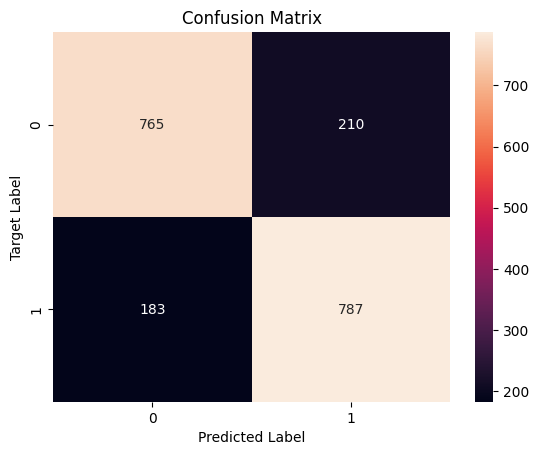

Classification Report: Support Vector Machines
              precision    recall  f1-score   support

           0     0.8124    0.7815    0.7967       975
           1     0.7885    0.8186    0.8032       970

    accuracy                         0.8000      1945
   macro avg     0.8004    0.8000    0.7999      1945
weighted avg     0.8005    0.8000    0.7999      1945



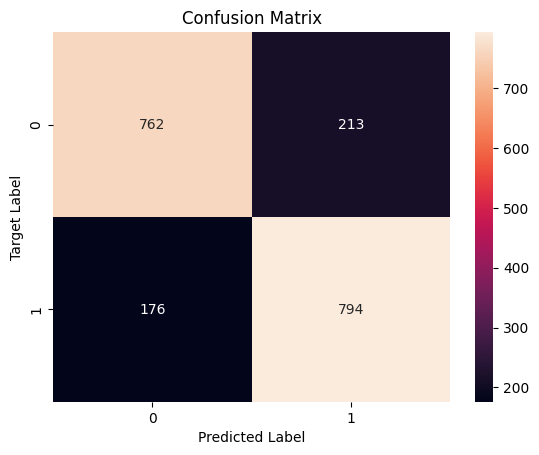

Classification Report: Decision Trees
              precision    recall  f1-score   support

           0     0.9259    0.8974    0.9115       975
           1     0.9000    0.9278    0.9137       970

    accuracy                         0.9126      1945
   macro avg     0.9130    0.9126    0.9126      1945
weighted avg     0.9130    0.9126    0.9126      1945



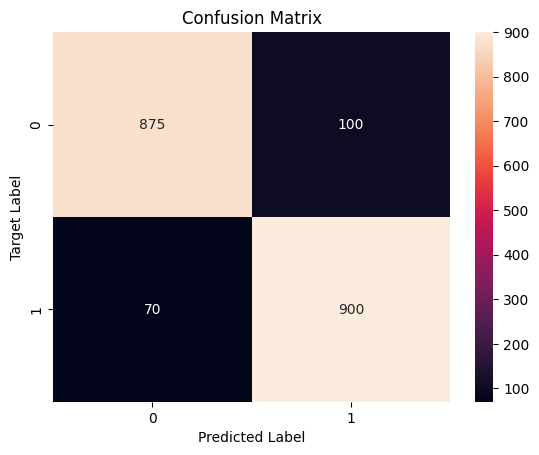

Classification Report: Random Forest
              precision    recall  f1-score   support

           0     0.9607    0.9272    0.9436       975
           1     0.9293    0.9619    0.9453       970

    accuracy                         0.9445      1945
   macro avg     0.9450    0.9445    0.9445      1945
weighted avg     0.9450    0.9445    0.9445      1945



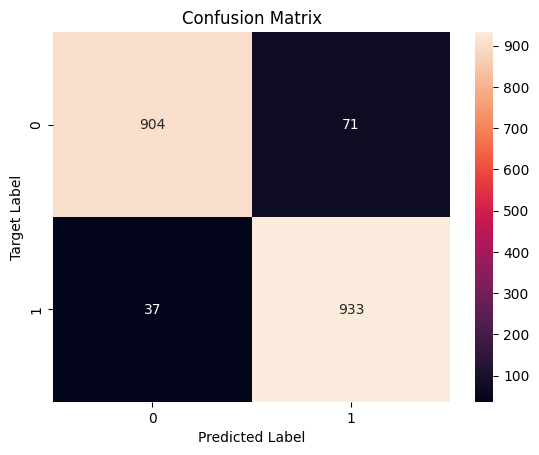

Classification Report: Naive Bayes
              precision    recall  f1-score   support

           0     0.8267    0.7190    0.7691       975
           1     0.7502    0.8485    0.7963       970

    accuracy                         0.7835      1945
   macro avg     0.7884    0.7837    0.7827      1945
weighted avg     0.7885    0.7835    0.7827      1945



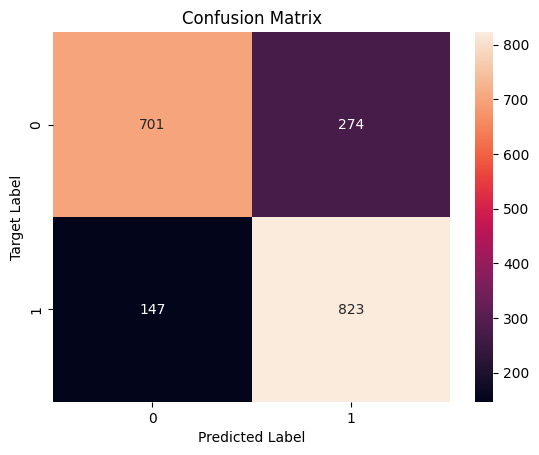

Classification Report: K-Nearest Neighbor
              precision    recall  f1-score   support

           0     0.9345    0.8051    0.8650       975
           1     0.8281    0.9433    0.8819       970

    accuracy                         0.8740      1945
   macro avg     0.8813    0.8742    0.8735      1945
weighted avg     0.8814    0.8740    0.8734      1945



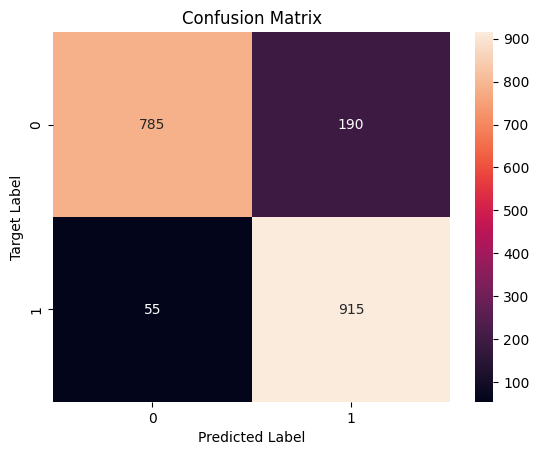

Classification Report: Extra Tree Classifier
              precision    recall  f1-score   support

           0     0.9649    0.9303    0.9473       975
           1     0.9323    0.9660    0.9489       970

    accuracy                         0.9481      1945
   macro avg     0.9486    0.9481    0.9481      1945
weighted avg     0.9487    0.9481    0.9481      1945



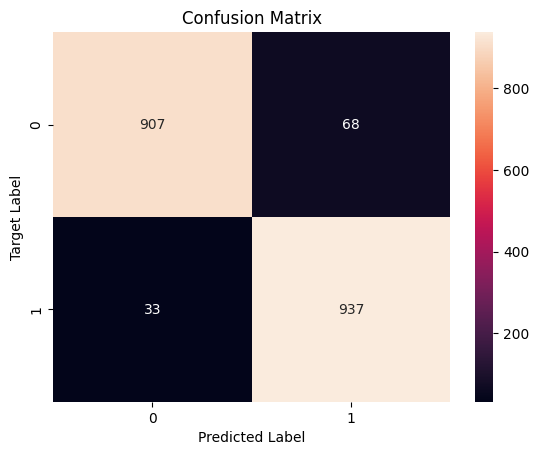

Classification Report: Xgboost
              precision    recall  f1-score   support

           0     0.9673    0.9405    0.9537       975
           1     0.9418    0.9680    0.9548       970

    accuracy                         0.9542      1945
   macro avg     0.9546    0.9543    0.9542      1945
weighted avg     0.9546    0.9542    0.9542      1945



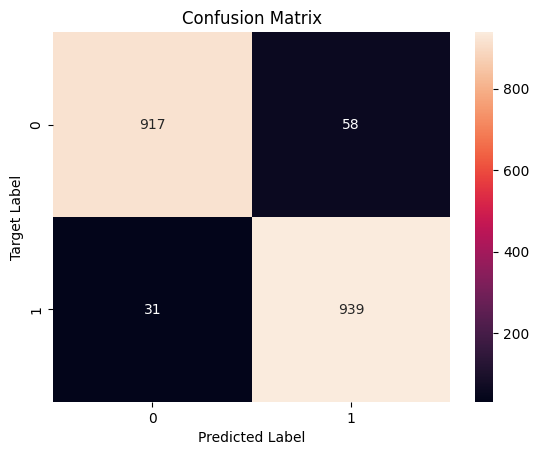

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, Y_train, X_val, Y_val are defined somewhere in your code

models = {}

# Logistic regression
models['Logistic Regression'] = LogisticRegression()

# Support vector machines
models['Support Vector Machines'] = LinearSVC()

# Decision trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# Extra Tree Classifier
models['Extra Tree Classifier'] = ExtraTreesClassifier(n_estimators=1000, max_features=10, random_state=42)

# XGBoost
models['Xgboost'] = XGBClassifier()

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    models[key].fit(X_train, Y_train)
    predictions = models[key].predict(X_val)

    accuracy[key] = accuracy_score(Y_val, predictions)
    precision[key] = precision_score(Y_val, predictions)
    recall[key] = recall_score(Y_val, predictions)

    print('Classification Report:', key)
    print(classification_report(Y_val, predictions, digits=4))

    sns.heatmap(confusion_matrix(Y_val, predictions), fmt='', annot=True)
    plt.xlabel('Predicted Label')
    plt.ylabel('Target Label')
    plt.title('Confusion Matrix')
    plt.show()


In [19]:
import pandas as pd
df_model = pd.DataFrame(index = models.keys(), columns = ['Accuracy','Precision','Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model.round(4)

,Accuracy,Precision,Recall
Logistic Regression,0.7979,0.7894,0.8113
Support Vector Machines,0.8000,0.7885,0.8186
Decision Trees,0.9126,0.9000,0.9278
Random Forest,0.9445,0.9293,0.9619
Naive Bayes,0.7835,0.7502,0.8485
K-Nearest Neighbor,0.8740,0.8281,0.9433
Extra Tree Classifier,0.9481,0.9323,0.9660
Xgboost,0.9542,0.9418,0.9680


In [20]:
accuracy_ensemble, precision_ensemble,recall_ensemble = {}, {}, {}
models_ensemble = {}

In [23]:
def evaluate(model, X_train, X_val, Y_train, Y_val, key):
    model.fit(X_train, Y_train)
    predictions = model.predict(X_val)

    accuracy_ensemble[key] = accuracy_score(Y_val, predictions)
    precision_ensemble[key] = precision_score(Y_val, predictions)
    recall_ensemble[key] = recall_score(Y_val, predictions)

    auc = roc_auc_score(Y_val, predictions)
    print('Classification Report:')
    print(classification_report(Y_val, predictions, digits=4))

    sns.heatmap(confusion_matrix(Y_val, predictions), fmt='', annot=True)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0     0.9652    0.9374    0.9511       975
           1     0.9389    0.9660    0.9522       970

    accuracy                         0.9517      1945
   macro avg     0.9520    0.9517    0.9517      1945
weighted avg     0.9520    0.9517    0.9517      1945



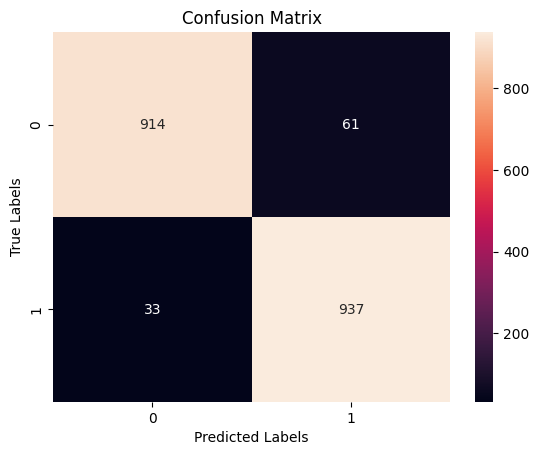

In [25]:
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(model, X_train, X_val, Y_train, Y_val, key):
    model.fit(X_train, Y_train)
    predictions = model.predict(X_val)

    accuracy_ensemble[key] = accuracy_score(Y_val, predictions)
    precision_ensemble[key] = precision_score(Y_val, predictions)
    recall_ensemble[key] = recall_score(Y_val, predictions)

    print('Classification Report:')
    print(classification_report(Y_val, predictions, digits=4))

    sns.heatmap(confusion_matrix(Y_val, predictions), fmt='', annot=True)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

tree = XGBClassifier()
models_ensemble = {}
models_ensemble['Bagging'] = BaggingClassifier(base_estimator=tree, n_estimators=40, random_state=0)

evaluate(models_ensemble['Bagging'], X_train, X_val, Y_train, Y_val, 'Bagging')


Classification Report:
              precision    recall  f1-score   support

           0     0.8884    0.8410    0.8641       975
           1     0.8483    0.8938    0.8705       970

    accuracy                         0.8674      1945
   macro avg     0.8684    0.8674    0.8673      1945
weighted avg     0.8684    0.8674    0.8673      1945



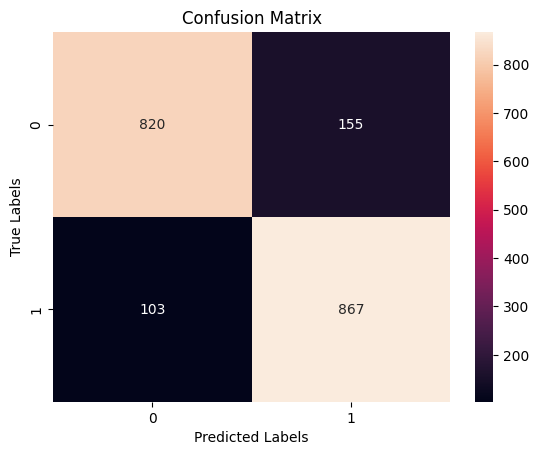

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(model, X_train, X_val, Y_train, Y_val, key):
    model.fit(X_train, Y_train)
    predictions = model.predict(X_val)

    accuracy_ensemble[key] = accuracy_score(Y_val, predictions)
    precision_ensemble[key] = precision_score(Y_val, predictions)
    recall_ensemble[key] = recall_score(Y_val, predictions)

    print('Classification Report:')
    print(classification_report(Y_val, predictions, digits=4))

    sns.heatmap(confusion_matrix(Y_val, predictions), fmt='', annot=True)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

models_ensemble = {}
models_ensemble['Gradient Boost'] = GradientBoostingClassifier(n_estimators=100, random_state=42)

evaluate(models_ensemble['Gradient Boost'], X_train, X_val, Y_train, Y_val, 'Gradient Boost')
